In [1]:
import sys
sys.path.insert(0, '../src')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataloader.dataloader import get_dataloader
from dataloader.dataloader import SlidingWindowDataset, OverlappingWindowDataset
from model import createArimaModel, createLinearRegressionModel
from sklearn.metrics import mean_squared_error
import numpy as np

## Data Exploration

In [2]:
# Load the CSV data into a DataFrame
df = pd.read_csv('../data/AirPassengers.csv')
df[['year', 'month']] = df['date'].str.split('-', expand=True)

# Convert 'year' and 'month' to numeric
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])
# Display the first few rows of the DataFrame
df.head()

,date,passengers,year,month
0,1949-01,112,1949,1
1,1949-02,118,1949,2
2,1949-03,132,1949,3
3,1949-04,129,1949,4
4,1949-05,121,1949,5


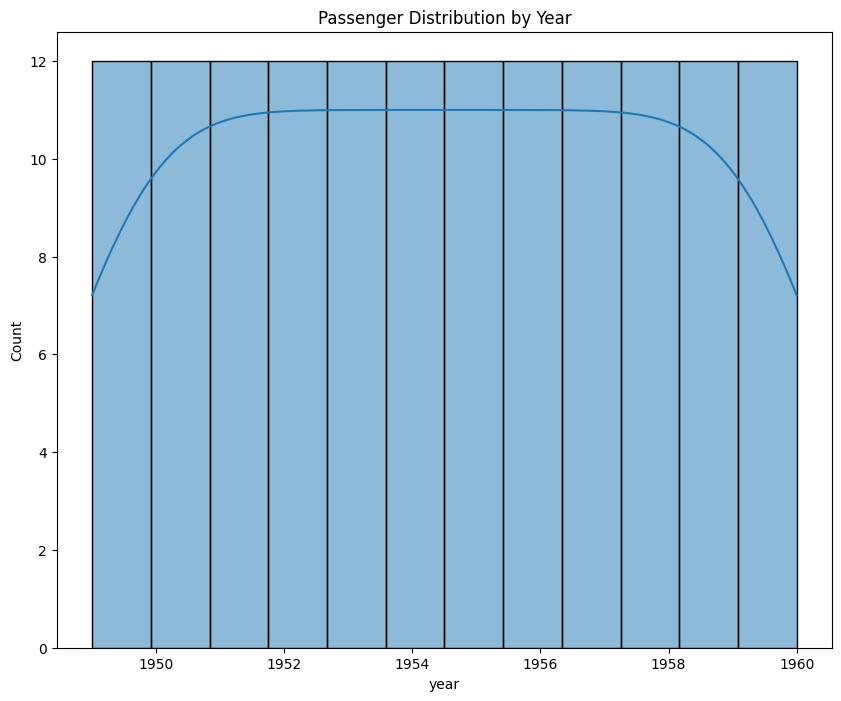

In [3]:
# Create a histogram of the 'year' column
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='year', bins=12, kde=True)
plt.title('Passenger Distribution by Year')
plt.show()

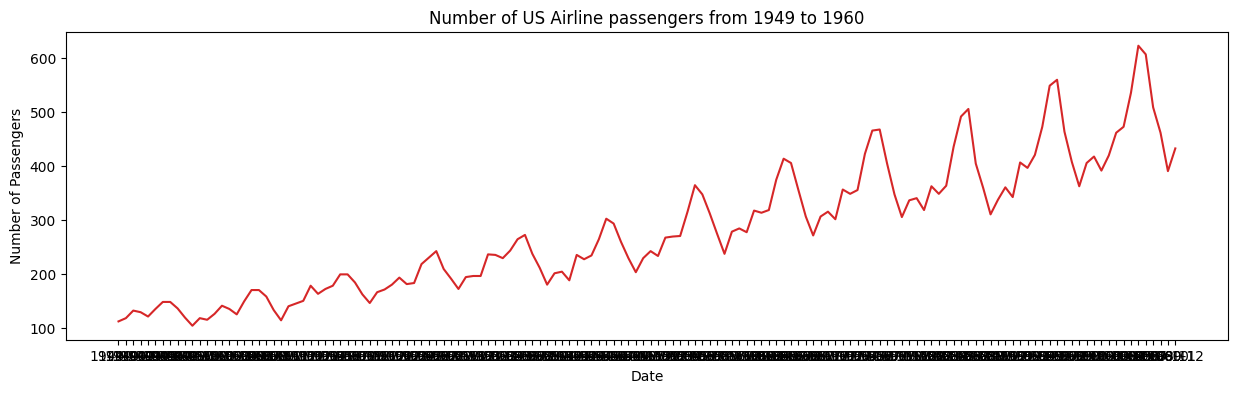

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['date'], y=df['passengers'], title='Number of US Airline passengers from 1949 to 1960')

In [5]:
data = df['passengers'].to_numpy()
sliding_dataset = SlidingWindowDataset(data, window_size=6)
overlapping_dataset = OverlappingWindowDataset(data, window_size=6, overlap=1)

slidingDataloader = get_dataloader(sliding_dataset, batch_size=3)
overlappingDataloader = get_dataloader(overlapping_dataset, batch_size=3)

In [6]:
for x, y in slidingDataloader:
    print(x, y)
    break

tensor([[112, 118, 132, 129, 121, 135],
        [118, 132, 129, 121, 135, 148],
        [132, 129, 121, 135, 148, 148]]) tensor([148, 136, 119])


In [7]:
for x, y in overlappingDataloader:
    print(x, y)
    break



tensor([[112, 118, 132, 129, 121, 135],
        [118, 132, 129, 121, 135, 148],
        [132, 129, 121, 135, 148, 148]]) tensor([148, 148, 136])


## ARIMA Benchmark

In [14]:
X = df['passengers'].values.reshape(-1, 1)  # Convert the 'passengers' column to a numpy array

# Split the data into training and testing sets
train_size = int(len(X) * 0.5)  # Use 80% of the data for training
# X_train, X_test = X[0:train_size], X[train_size:len(X)]

# arima_benchmark = createArimaModel(X_train, X_test)
linear_regression_benchmark = createLinearRegressionModel(X)
# Use the model to make predictions on the test data
new_list = [X[i+1:i+4] for i in range(len(X)-3)]
new_list = np.vstack(new_list)
predictions = linear_regression_benchmark.predict(new_list)

# # Calculate the mean squared error of the predictions
# mse = mean_squared_error(new_list, predictions)

# # Print the mean squared error
# print("Mean Squared Error:", mse)

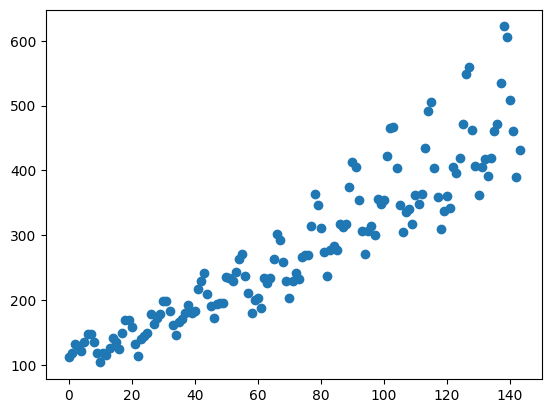

In [18]:
# # Predict the future values
# future_values = linear_regression_benchmark.predict(new_list)

# plt.scatter(np.array(range(len(data))), data)
# plt.plot(np.array(range(len(data))), predictions, color='r')
# plt.show()
# Assuming 'data' is your data and 'df' is your DataFrame
plt.scatter(df.index, df['passengers'])
plt.show()

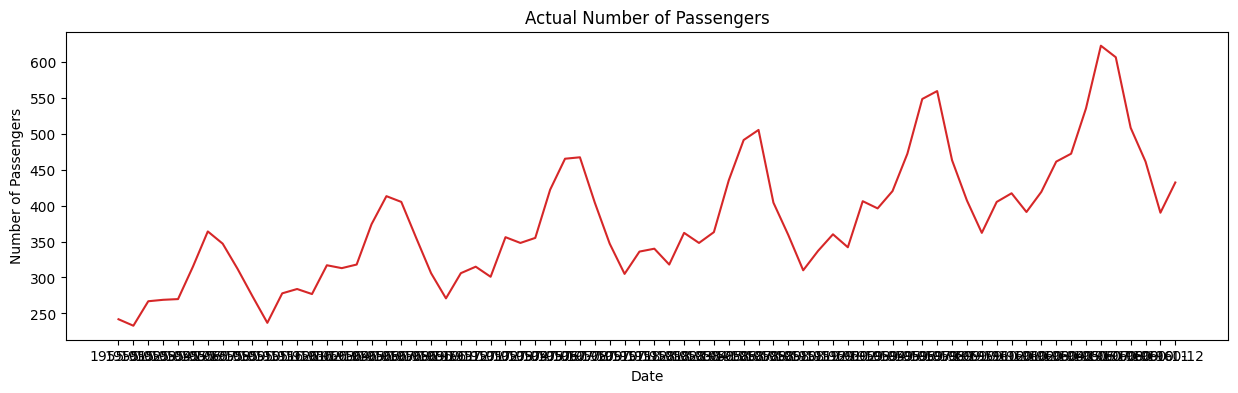

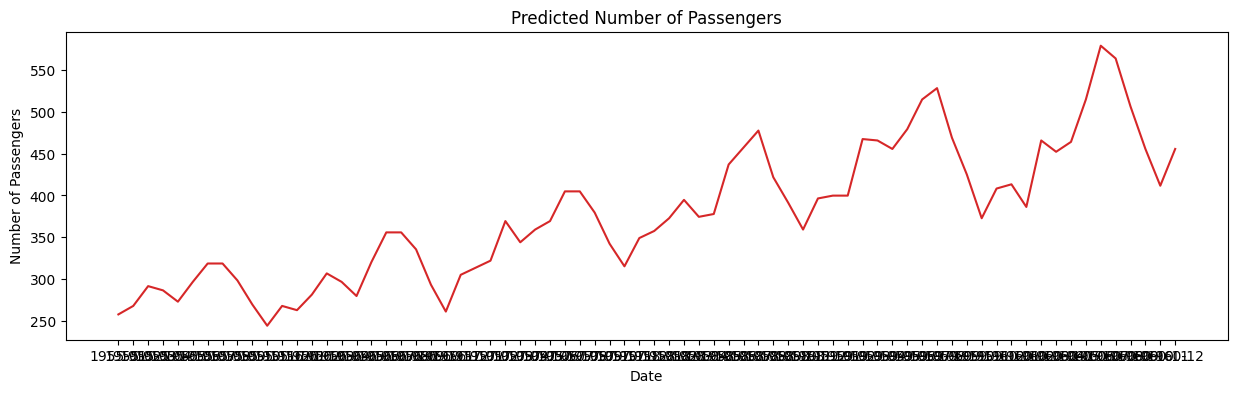

In [ ]:
# Predict the future values
future_values = linear_regression_benchmark

# Plot the actual and predicted values
plot_df(df, x=df['date'][train_size:], y=X_test, title='Actual Number of Passengers')
plot_df(df, x=df['date'][train_size:], y=future_values, title='Predicted Number of Passengers')

In [ ]:
future_values = linear_regression_benchmark.predict(X_test)

# Plot the actual and predicted values
plot_df(df, x=df['date'][train_size:], y=X_test, title='Actual Number of Passengers')
plot_df(df, x=df['date'][train_size:], y=future_values, title='Predicted Number of Passengers')